## Exercise

- Create a GitHub repo.
- Create a notebook in python, and do a wordcloud with a text in English. Use a file in txt.
- Create a notebook in python, and do a bigram the previous txt file.
- Publish the result as a webpage using GitHub

In [1]:
import os
import pandas as pd

In [4]:
textFile=os.path.join('data','burocracia.txt')
allText=pd.read_table(textFile,header=None)

In [5]:
PUNCs = r'!"#$%&\()\*\+,-\./:;<=>\?@\[\]\^_`\{\|\}\~'
allText[0] = allText[0].str.lower()
allText[0] = allText[0].str.replace('['+PUNCs+']', '', regex=True)

In [13]:
import nltk
nltk.download('stopwords') #importanto los stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ricardo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
STOPS = stopwords.words('english')

In [6]:
# see the text
allText

,0
0,technocracy and democracy in latin america
1,praised by some as islands of efficiency in a ...
2,politicized and corrupt states and criticized ...
3,ing wideranging areas of policy making from th...
4,technocrats have become prominent and controve...
...,...
9227,university of alabama 137
9228,uribe álvaro ...
9229,and health reform 123–124 127–128 ...
9230,importance of stakeholders to 85–86 ...


In [8]:
#pip install nltk

In [9]:
from nltk import bigrams

theBigrams=[bigrams(eachTW.split()) for eachTW in allText[0]]


# list of all bigrams
from itertools import chain

pairWords = list(chain(*theBigrams))

pairWords

[('technocracy', 'and'),
 ('and', 'democracy'),
 ('democracy', 'in'),
 ('in', 'latin'),
 ('latin', 'america'),
 ('praised', 'by'),
 ('by', 'some'),
 ('some', 'as'),
 ('as', 'islands'),
 ('islands', 'of'),
 ('of', 'efficiency'),
 ('efficiency', 'in'),
 ('in', 'a'),
 ('a', 'sea'),
 ('sea', 'of'),
 ('of', 'unprofessional'),
 ('politicized', 'and'),
 ('and', 'corrupt'),
 ('corrupt', 'states'),
 ('states', 'and'),
 ('and', 'criticized'),
 ('criticized', 'by'),
 ('by', 'others'),
 ('others', 'for'),
 ('for', 'remov'),
 ('ing', 'wideranging'),
 ('wideranging', 'areas'),
 ('areas', 'of'),
 ('of', 'policy'),
 ('policy', 'making'),
 ('making', 'from'),
 ('from', 'the'),
 ('the', 'democratic'),
 ('democratic', 'arena'),
 ('technocrats', 'have'),
 ('have', 'become'),
 ('become', 'prominent'),
 ('prominent', 'and'),
 ('and', 'controversial'),
 ('controversial', 'actors'),
 ('actors', 'in'),
 ('in', 'latin'),
 ('american', 'politics'),
 ('politics', 'nonelected'),
 ('nonelected', 'state'),
 ('state'

In [16]:
pairWords_clean = [gram for gram in pairWords if not any(stop in gram for stop in STOPS)]
print(pairWords_clean)
# se está filtrando la lista de los pairwords, eliminando los que contienen
#alguna palabra de una STOPS


[('latin', 'america'), ('corrupt', 'states'), ('ing', 'wideranging'), ('wideranging', 'areas'), ('policy', 'making'), ('democratic', 'arena'), ('become', 'prominent'), ('controversial', 'actors'), ('american', 'politics'), ('politics', 'nonelected'), ('nonelected', 'state'), ('state', 'officials'), ('advanced', 'educations'), ('top', 'universities'), ('universities', 'technocrats'), ('technocrats', 'achieved'), ('achieved', 'considerable'), ('considerable', 'autonomy'), ('economic', 'actors'), ('exerted', 'great'), ('great', 'influence'), ('countries’', 'fates'), ('finding', 'poses'), ('intriguing', 'paradox'), ('experts', 'lack'), ('independent', 'base'), ('via', 'popular'), ('popular', 'election'), ('also', 'lack'), ('tenure', 'enjoyed'), ('cratic', 'latin'), ('latin', 'america'), ('maintain', 'greater'), ('policy', 'areas'), ('health', 'policy'), ('2013', 'technocracy'), ('america', 'answers'), ('eduardo', 'dargent'), ('associate', 'professor'), ('political', 'science'), ('pontifici

In [17]:
from collections import Counter

bigramsCount_dict = Counter(pairWords_clean) #generamos el conteo

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount = pd.DataFrame(bigramsCount_dict.most_common(), #se crea el DF a artir del conteo
                        columns=['theBigram', 'weight'])

#most_common devuelve una lista de tuplas 

In [18]:
bigramsCount

,theBigram,weight
0,"(health, policy)",179
1,"(latin, america)",178
2,"(economic, policy)",158
3,"(author, interview)",138
4,"(health, care)",124
...,...,...
23185,"(zedillo, ernesto)",1
23186,"(ernesto, 3)",1
23187,"(85–86, zuluaga)",1
23188,"(zuluaga, oscar)",1


In [19]:
bigramsCount['word1'], bigramsCount['word2'] =zip(*bigramsCount['theBigram'])
#dividimos los bigramas en dos palabras separadas y las coloca en columnas separadas del df bigramscount

In [20]:
bigramsCount

,theBigram,weight,word1,word2
0,"(health, policy)",179,health,policy
1,"(latin, america)",178,latin,america
2,"(economic, policy)",158,economic,policy
3,"(author, interview)",138,author,interview
4,"(health, care)",124,health,care
...,...,...,...,...
23185,"(zedillo, ernesto)",1,zedillo,ernesto
23186,"(ernesto, 3)",1,ernesto,3
23187,"(85–86, zuluaga)",1,85–86,zuluaga
23188,"(zuluaga, oscar)",1,zuluaga,oscar


In [22]:
import networkx as nx
G_bigram=nx.from_pandas_edgelist(df=bigramsCount, source='word1',target= 'word2',edge_attr= ["weight"])
#creamos el grafo a partir del conteo bigramsCount

C:\Users\Ricardo\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 7 () missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Ricardo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


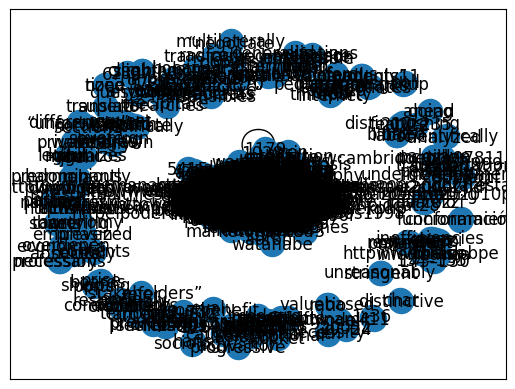

In [23]:
# plotting graph (default layout)
nx.draw_networkx(G_bigram)

In [24]:
#subsetting
bigramsCount_wgte_80=bigramsCount[bigramsCount['weight']>=80]
#creamos un sub df del conteo digramas count donde solo dejamos aquellas que tengan un mayor peso a 80
G_bigram_wgte_80=nx.from_pandas_edgelist(df=bigramsCount_wgte_80, source='word1',target= 'word2',edge_attr= ["weight"])


In [26]:
import matplotlib.pyplot as plt

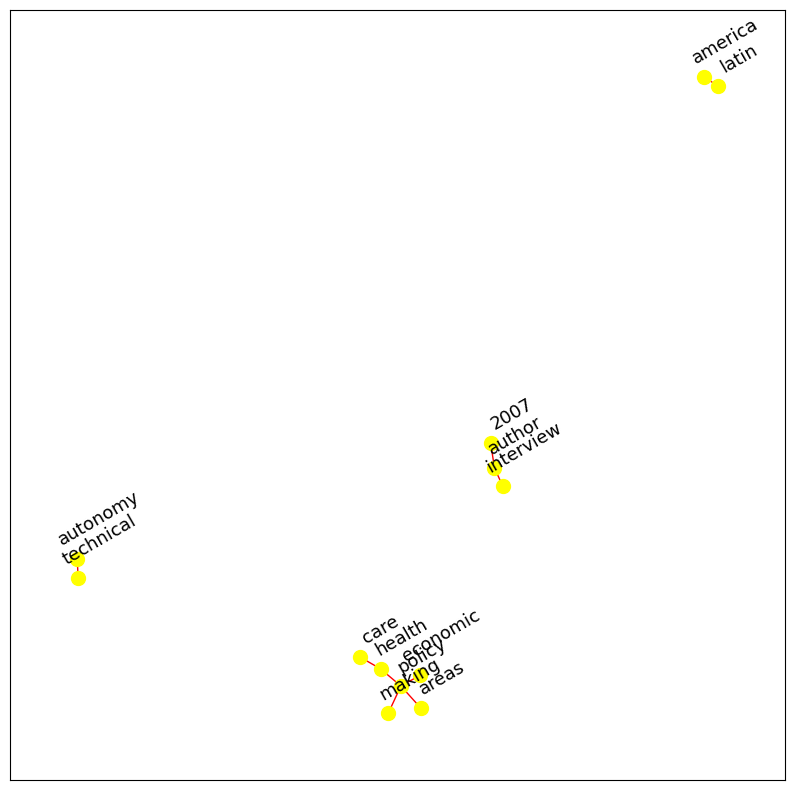

In [29]:
#plotting    
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_80)

# Plot networks
nx.draw_networkx(G_bigram_wgte_80, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=30)

    
plt.show()

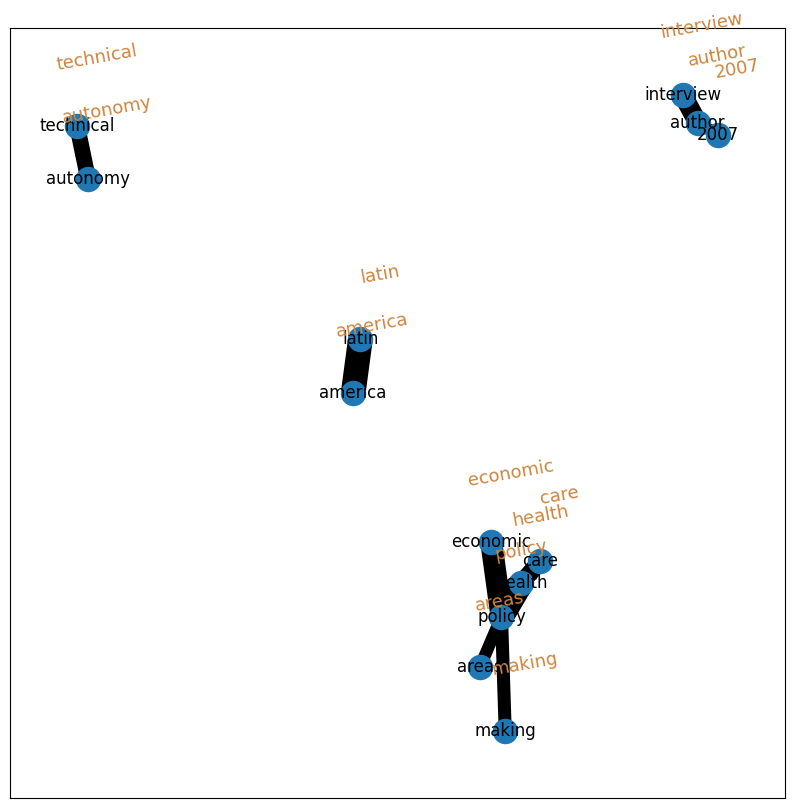

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_80, weight='weight',k=0.5)
nx.draw_networkx(G_bigram_wgte_80, pos)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=10, color='peru')

for edge in G_bigram_wgte_80.edges(data='weight'):
    nx.draw_networkx_edges(G_bigram_wgte_80, pos, edgelist=[edge], width=.1*edge[2])
    
    #edge accede al tercer elemento de la tupla que es el peso 
    #width es la proporcion, sirve para controlar el grosor de las lineas

Los siguientes códigos pueden resultar útiles en algún momento.


import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
STOPS = stopwords.words('english')